In [1]:
import numpy as np
import effector

In [2]:
np.random.seed(21)

In [3]:
X_test = np.random.uniform(-1, 1, (1000, 2))
axis_limits = np.array([[-1, -1], [1, 1]])

In [4]:
def predict(x):
    y = np.zeros(x.shape[0])
    ind = x[:, 1] > 0
    y[ind] = 10*x[ind, 0]
    y[~ind] = -10*x[~ind, 0]
    return y + np.random.normal(0, 1, x.shape[0])*.3

In [5]:
def jacobian(x):
    J = np.zeros((x.shape[0], 2))
    ind = x[:, 1] > 0
    J[ind, 0] = 10
    J[~ind, 0] = -10
    return J

In [6]:
y_limits = [-15, 15]
dy_limits = [-25, 25]

## Global Effect

### PDP

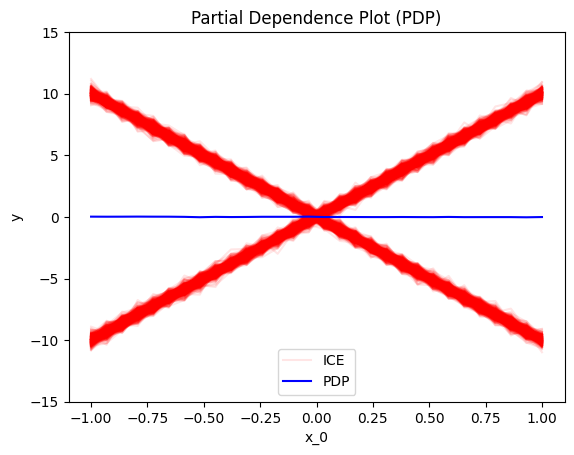

In [7]:
pdp = effector.PDP(X_test, predict, axis_limits=axis_limits, nof_instances="all")
pdp.plot(feature=0, y_limits=y_limits)

### RHALE

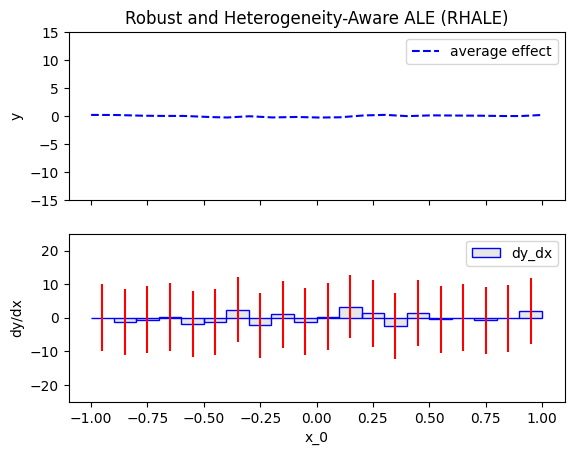

In [8]:
rhale = effector.RHALE(X_test, predict, jacobian, axis_limits=axis_limits, nof_instances="all")
rhale.plot(feature=0, y_limits=y_limits, dy_limits=dy_limits)

### SHAP-DP

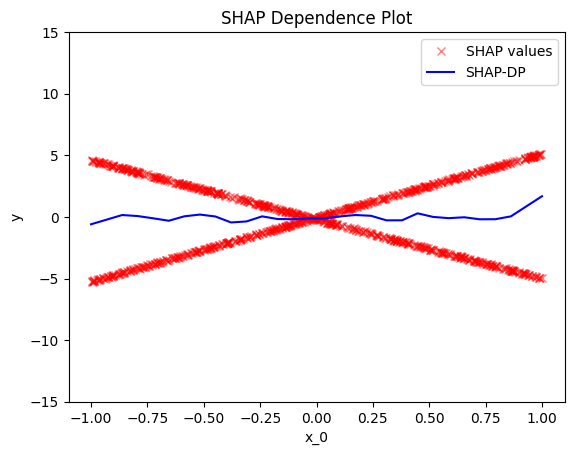

In [9]:
shapdp = effector.ShapDP(X_test, predict, axis_limits=axis_limits, nof_instances="all")
shapdp.plot(feature=0, y_limits=y_limits)

### ALE

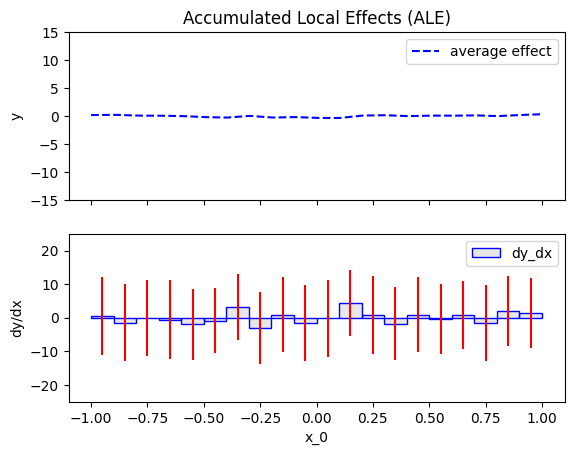

In [10]:
ale = effector.ALE(X_test, predict, axis_limits=axis_limits, nof_instances="all")
ale.plot(feature=0, y_limits=y_limits, dy_limits=dy_limits)

### d-PDP

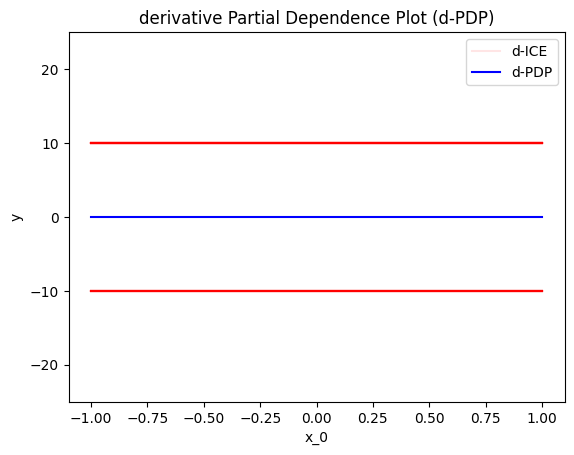

In [11]:
dpdp = effector.DerPDP(X_test, predict, model_jac=jacobian, axis_limits=axis_limits, nof_instances="all")
dpdp.plot(feature=0, dy_limits=dy_limits)

## Regional Effect

### RegionalPDP

In [12]:
r_pdp = effector.RegionalPDP(X_test, predict, axis_limits=axis_limits, nof_instances="all")
r_pdp.summary(features=0)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36.79it/s]



Feature 0 - Full partition tree:
🌳 Full Tree Structure:
───────────────────────
x_0 🔹 [id: 0 | heter: 35.71 | inst: 1000 | w: 1.00]
    x_1 ≤ 0.00 🔹 [id: 1 | heter: 0.09 | inst: 501 | w: 0.50]
    x_1 > 0.00 🔹 [id: 2 | heter: 0.09 | inst: 499 | w: 0.50]
--------------------------------------------------
Feature 0 - Statistics per tree level:
🌳 Tree Summary:
─────────────────
Level 0🔹heter: 35.71
    Level 1🔹heter: 0.09 | 🔻35.62 (99.74%)




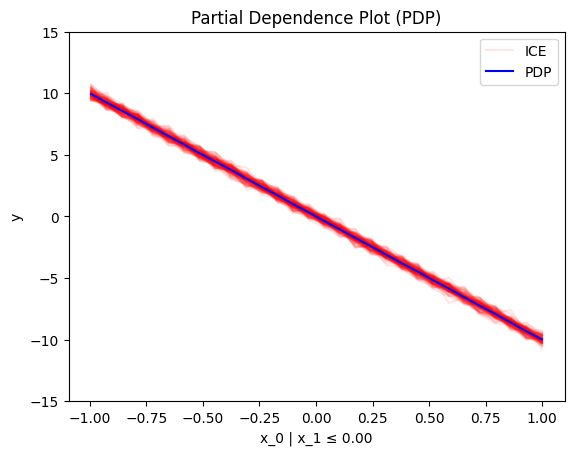

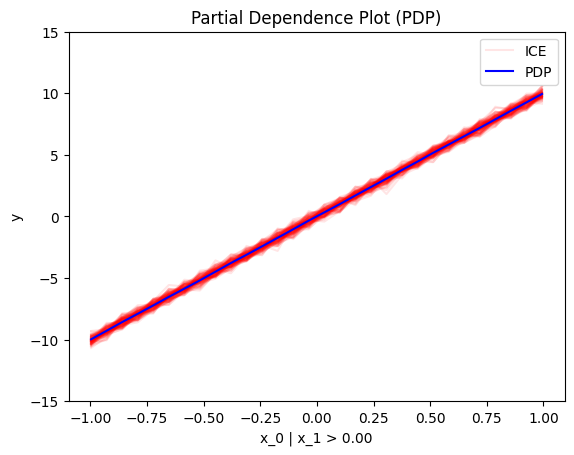

[None, None]

In [13]:
[r_pdp.plot(feature=0, node_idx=i, y_limits=y_limits) for i in range(1, 3)]

### Regional RHALE

In [14]:
r_rhale = effector.RegionalRHALE(X_test, predict, jacobian, axis_limits=axis_limits, nof_instances="all")
r_rhale.summary(features=0)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.60it/s]



Feature 0 - Full partition tree:
🌳 Full Tree Structure:
───────────────────────
x_0 🔹 [id: 0 | heter: 97.38 | inst: 1000 | w: 1.00]
    x_1 ≤ 0.00 🔹 [id: 1 | heter: 0.00 | inst: 501 | w: 0.50]
    x_1 > 0.00 🔹 [id: 2 | heter: 0.00 | inst: 499 | w: 0.50]
--------------------------------------------------
Feature 0 - Statistics per tree level:
🌳 Tree Summary:
─────────────────
Level 0🔹heter: 97.38
    Level 1🔹heter: 0.00 | 🔻97.38 (100.00%)




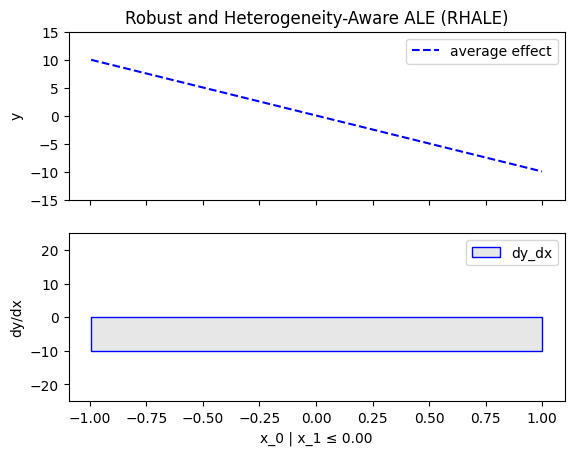

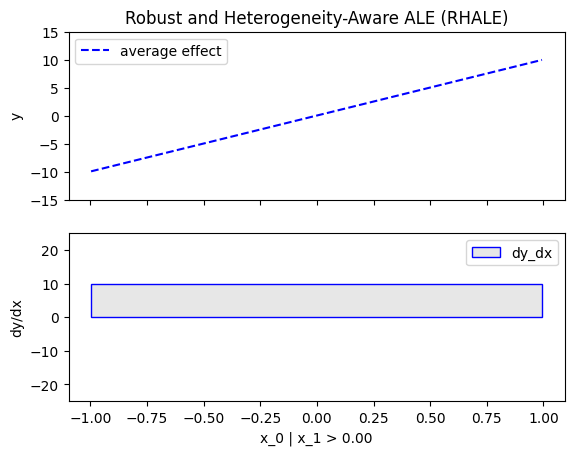

[None, None]

In [15]:
[r_rhale.plot(feature=0, node_idx=i, y_limits=y_limits, dy_limits=dy_limits) for i in range(1, 3)]

### RegionalShapDP

In [16]:
r_shapdp = effector.RegionalShapDP(X_test, predict, axis_limits=axis_limits, nof_instances="all")
r_shapdp.summary(features=0)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.36it/s]



Feature 0 - Full partition tree:
🌳 Full Tree Structure:
───────────────────────
x_0 🔹 [id: 0 | heter: 8.83 | inst: 1000 | w: 1.00]
    x_1 ≤ 0.00 🔹 [id: 1 | heter: 0.02 | inst: 501 | w: 0.50]
    x_1 > 0.00 🔹 [id: 2 | heter: 0.02 | inst: 499 | w: 0.50]
--------------------------------------------------
Feature 0 - Statistics per tree level:
🌳 Tree Summary:
─────────────────
Level 0🔹heter: 8.83
    Level 1🔹heter: 0.02 | 🔻8.81 (99.76%)




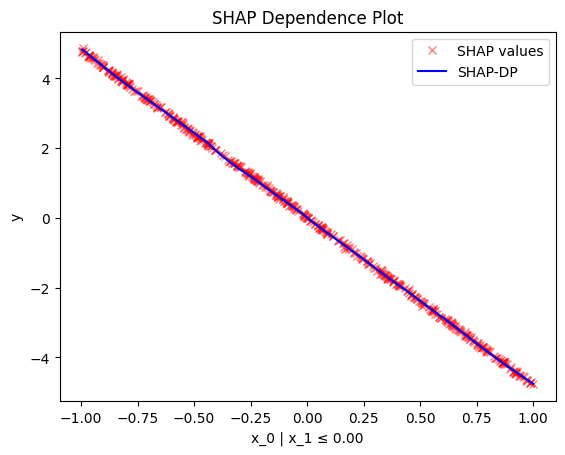

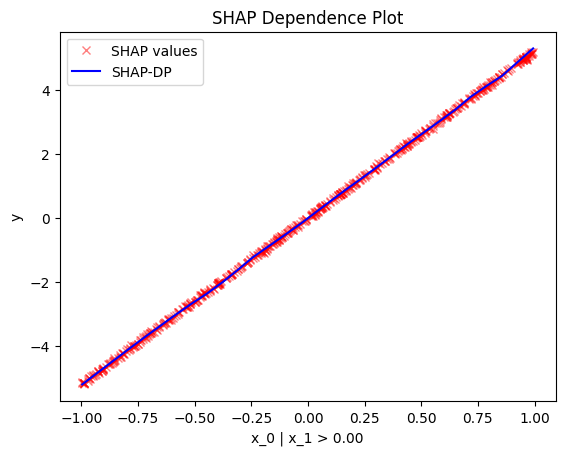

[None, None]

In [17]:
[r_shapdp.plot(feature=0, node_idx=i) for i in range(1, 3)]

### RegionalALE

In [18]:
r_ale = effector.RegionalALE(X_test, predict, axis_limits=axis_limits, nof_instances="all")
r_ale.summary(features=0)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33.36it/s]



Feature 0 - Full partition tree:
🌳 Full Tree Structure:
───────────────────────
x_0 🔹 [id: 0 | heter: 113.77 | inst: 1000 | w: 1.00]
    x_1 ≤ 0.00 🔹 [id: 1 | heter: 15.71 | inst: 501 | w: 0.50]
        x_1 ≤ -0.50 🔹 [id: 2 | heter: 12.91 | inst: 259 | w: 0.26]
        x_1 > -0.50 🔹 [id: 3 | heter: 15.36 | inst: 242 | w: 0.24]
    x_1 > 0.00 🔹 [id: 4 | heter: 17.01 | inst: 499 | w: 0.50]
--------------------------------------------------
Feature 0 - Statistics per tree level:
🌳 Tree Summary:
─────────────────
Level 0🔹heter: 113.77
    Level 1🔹heter: 16.36 | 🔻97.42 (85.62%)
        Level 2🔹heter: 7.06 | 🔻9.29 (56.82%)




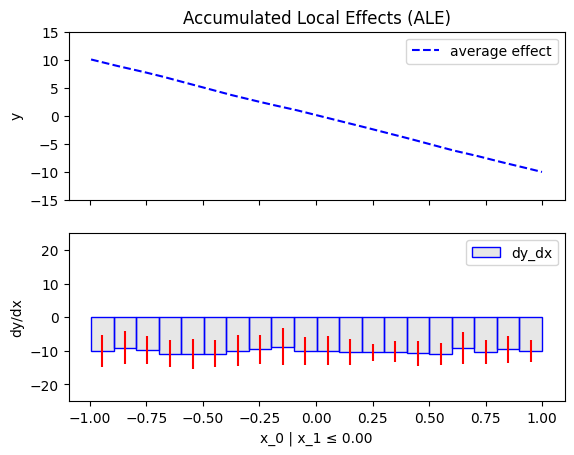

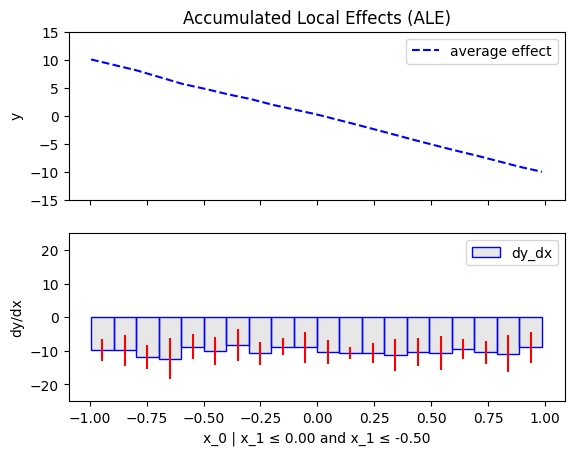

[None, None]

In [19]:
[r_ale.plot(feature=0, node_idx=i, y_limits=y_limits, dy_limits=dy_limits) for i in range(1, 3)]

### RegionalDerPDP

In [21]:
r_dpdp = effector.RegionalDerPDP(X_test, predict, jacobian, axis_limits=axis_limits, nof_instances="all")
r_dpdp.summary(features=0)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 103.09it/s]



Feature 0 - Full partition tree:
🌳 Full Tree Structure:
───────────────────────
x_0 🔹 [id: 0 | heter: 100.00 | inst: 1000 | w: 1.00]
    x_1 ≤ 0.00 🔹 [id: 1 | heter: 0.00 | inst: 501 | w: 0.50]
    x_1 > 0.00 🔹 [id: 2 | heter: 0.00 | inst: 499 | w: 0.50]
--------------------------------------------------
Feature 0 - Statistics per tree level:
🌳 Tree Summary:
─────────────────
Level 0🔹heter: 100.00
    Level 1🔹heter: 0.00 | 🔻100.00 (100.00%)




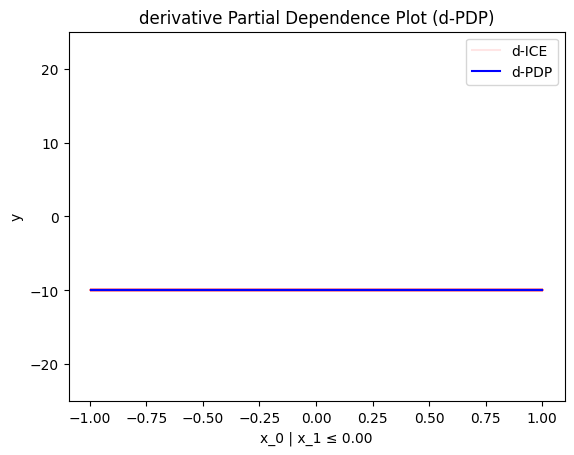

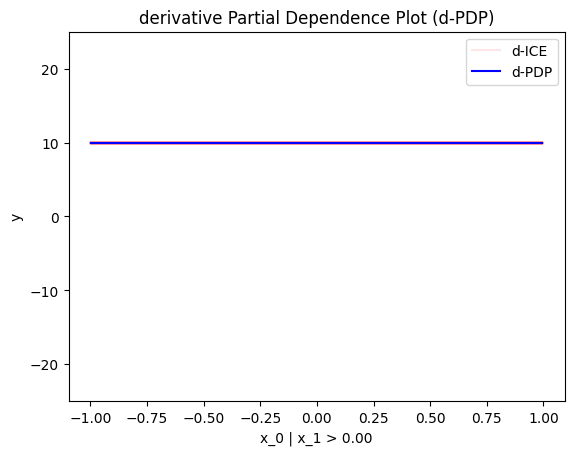

[None, None]

In [22]:
[r_dpdp.plot(feature=0, node_idx=i, dy_limits=dy_limits) for i in range(1, 3)]